### Importing libraries

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential

### Load data training data

In [2]:
cat_files = os.listdir("dataset/training_set/cats")
dog_files = os.listdir("dataset/training_set/dogs")

In [15]:
cat_images = []
for i in range(1,len(cat_files)-1):
    if i < 4001:
    
        a=cat_files[i]
        c = f"dataset/training_set/cats/cat.{i}.jpg"
        img = plt.imread(c).copy()
        img = cv2.resize(img,(100,100))
        cat_images.append(np.array([img,0]))
dog_images = []
for i in range(1,len(dog_files)):
    if i < 4001:
        img = plt.imread(f"dataset/training_set/dogs/dog.{i}.jpg").copy()
        img = cv2.resize(img,(100,100))
        dog_images.append(np.array([img,1]))

In [16]:
training_data = cat_images+dog_images

In [17]:
random.shuffle(training_data)

### Loading testing data

In [28]:
cat_files = os.listdir("dataset/test_set/cats")
dog_files = os.listdir("dataset/test_set/dogs")
cat_images = []
for i in range(1,1000):
    if (i<5000):
        img = plt.imread(f"dataset/test_set/cats/cat.{4000+i}.jpg").copy()
        img = cv2.resize(img,(100,100))
        cat_images.append(np.array([img,0]))
dog_images = []
for i in range(1,1000):
    if(i<5000):
        img = plt.imread(f"dataset/test_set/dogs/dog.{4000+i}.jpg").copy()
        img = cv2.resize(img,(100,100))
        dog_images.append(np.array([img,1]))

In [29]:
testing_data = cat_images + dog_images
random.shuffle(testing_data)

### Visualization

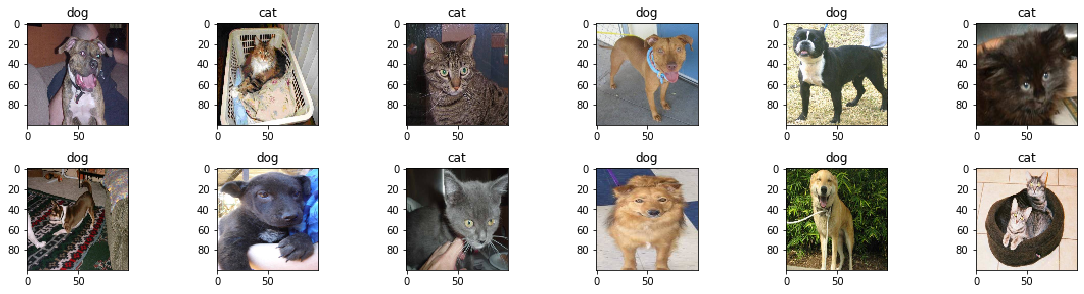

In [30]:
plt.figure(figsize = (16,10))
name = {0: "cat", 1: "dog"}
c = 1
for i,j in training_data[:12]:
    plt.subplot(5,6,c)
    c += 1
    plt.imshow(i)
    plt.title(name[j])
plt.tight_layout()
plt.show()

## Data Preperation

In [31]:
x_train = []
x_test = []
y_train = []
y_test = []
for i, j in training_data:
    x_train.append(i)
    y_train.append(j)
for i, j in testing_data:
    x_test.append(i)
    y_test.append(j)

In [32]:
x_train = np.array(x_train)/255
x_test = np.array(x_test)/255

### Building the model

In [37]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 64)        256       
____

### compiling the model

In [38]:
history = model.fit(x_train, y_train, epochs = 5, validation_data = (x_test[:100], y_test[:100]))

Train on 8000 samples, validate on 100 samples
Epoch 1/5
8000/8000 [==============================] - 965s 121ms/sample - loss: 0.9270 - acc: 0.6204 - val_loss: 2.4428 - val_acc: 0.4900
Epoch 2/5
8000/8000 [==============================] - 7546s 943ms/sample - loss: 0.5902 - acc: 0.7082 - val_loss: 0.7322 - val_acc: 0.6100
Epoch 3/5
8000/8000 [==============================] - 537s 67ms/sample - loss: 0.4976 - acc: 0.7614 - val_loss: 0.5297 - val_acc: 0.8200
Epoch 4/5
8000/8000 [==============================] - 527s 66ms/sample - loss: 0.4251 - acc: 0.8071 - val_loss: 0.6483 - val_acc: 0.7900
Epoch 5/5
8000/8000 [==============================] - 535s 67ms/sample - loss: 0.3839 - acc: 0.8290 - val_loss: 0.6388 - val_acc: 0.7300


### Training the model

1998/1998 - 21s - loss: 0.5632 - acc: 0.7352


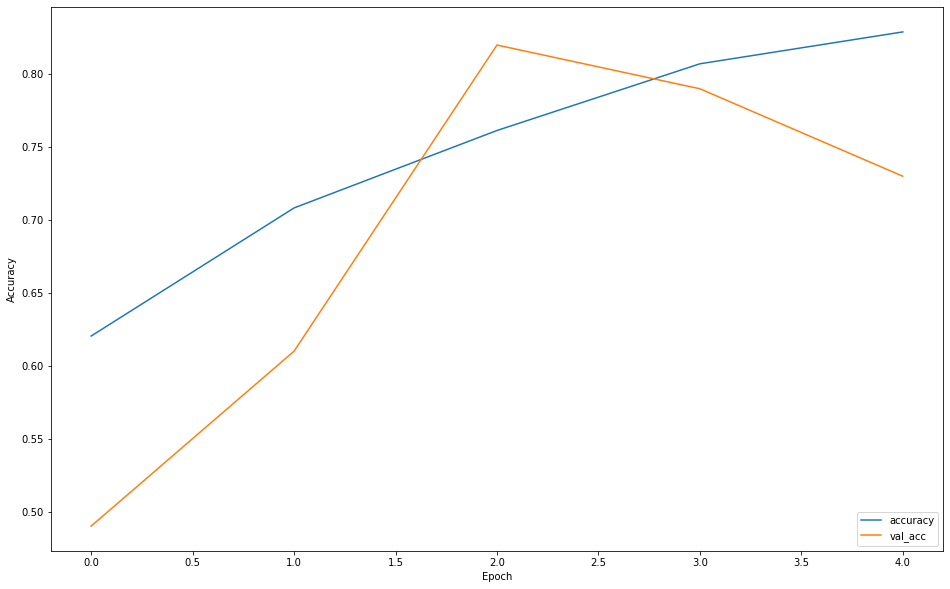

In [39]:
plt.figure(figsize = (16,10))
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

In [40]:
predict = []
for i in model.predict(x_test):
    predict.append(np.argmax(i))

In [41]:
x_test = (x_test*255).astype(np.uint8)

In [42]:
x_test = x_test.astype(np.uint8)

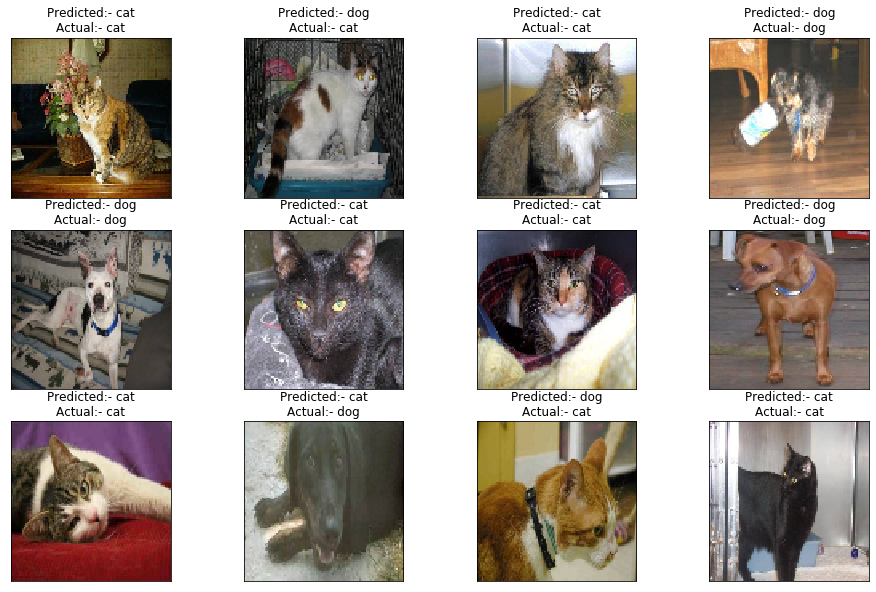

In [43]:
identifier = {0: "cat", 1: "dog"}
plt.figure(figsize = (16,10))
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted:- " + identifier[predict[i]] + "\n" + "Actual:- " + identifier[y_test[i]])
plt.show()